# Asemic writing with Flat

By [Allison Parrish](https://www.decontextualize.com/)

This is a tutorial on how to use [flat](https://xxyxyz.org/flat), the random functions from [Numpy](http://www.numpy.org/) and [bezmerizing](https://github.com/aparrish/bezmerizing/) (a small library I made with simple functions for working with Bézier curves) to make various kinds of asemic writing.

## Installation and preliminaries

There are a number of Python libraries for drawing vector graphics, but [flat](https://xxyxyz.org/flat) is my favorite one to work with. It's small, powerful and elegant. It's also written in pure Python (i.e., does not need compiled code) and has no external dependencies, which makes it especially easy to install:

In [1]:
!pip install flat

You are using pip version 9.0.3, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In this tutorial, I'm only using a subset of flat's functionality. The cell below imports the three functions from the library that I'm going to use.

In [6]:
from flat import document, shape, rgba

The flat library can export images in a handful of formats, including PNG. We can leverage this to "embed" the results of running flat code right into a Jupyter Notebook as we're working. The cell below creates a function `show()` that takes a flat `page` object, renders it as an SVG, and displays it in the notebook. I use this extensively below!

In [1]:
from IPython.display import SVG, display
def show(page):
    display(SVG(page.svg()))

[Bezmerizing](https://github.com/aparrish/bezmerizing/) is a small library I made with a handful of useful functions for working with Bézier curves, including a function for making smooth curved paths based on a list of points, and a function that can style such paths by adjusting their thickness along the path. Install it directly from GitHub like so:

In [4]:
!pip install https://github.com/aparrish/bezmerizing/archive/master.zip

     \ 225kB 759kB/s
You are using pip version 9.0.3, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
from bezmerizing import smooth_point_path, fancy_curve

Assuming you're running this notebook with Anaconda, you probably already have Numpy installed. [Numpy](http://www.numpy.org/) is a widely-used Python library for math and statistics. I'm going to show you how to use a handful of functions from Numpy for generating random numbers. Use the cells below to import them into your notebook:

In [3]:
import numpy as np

In [4]:
from numpy.random import uniform, normal, choice

## Making shapes with flat

Drawing with flat consists of a few steps:

1. Create a document
2. Add a page to the document
3. Create shapes
4. Place shapes on the page
5. Display the page (or the document).

A minimal example skips steps 3 and 4:

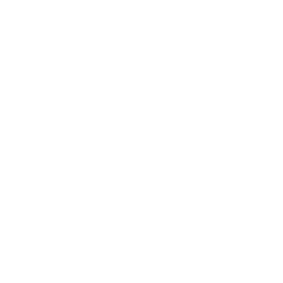

In [7]:
d = document(100, 100, 'mm') # create a document 100mm x 100mm (can replace 'mm' with 'pt')
page = d.addpage() # add a page
show(page) # show the page

... but doesn't display anything. We've just made a blank page.

To add a shape, create a `shape` object with the `shape()` function. The object returned from this function has methods that let you set the fill, stroke, and stroke width of the shape. Colors are specified with the `rgba()` function, which takes four parameters: the red, green, and blue components of the color (in the range 0—255), along with an alpha value (which controls how "transparent" the color will be—0 is completely transparent and 255 is completely opaque).

In [8]:
figure = shape()
figure.fill(rgba(255, 128, 255, 255))
figure.stroke(rgba(128, 0, 255, 255))
figure.width(4)

A `shape` object acts as a kind of container for a list of paths to draw with the fill and stroke you specified when you created the object. Add a rectangle to the shape with the `.rectangle()` method:

In [9]:
rect = figure.rectangle(5, 5, 90, 90)

This creates a rectangle at position (5, 5) on the page with a width of 90 and a height of 90. ([See the documentation for a full list of shape methods and an explanation of what their parameters mean.](https://xxyxyz.org/flat))

> Note for first-time programmers: Any word to the *left* of an equal sign (`=`) is called a *variable*. A "variable" takes the result of running some code and stores it for later under the name that you give it—sort of naming a file or putting a label on a folder. I used the word `rect` above to store the result of creating the `rectangle` shape, but you can use whatever word you want, as long as you use the same word when referring back to that value later. (There's nothing magical about calling it `rect`—I could have called is `lawrence` or `afkjsdhf`. Using `rect` just makes it easier to remember what I was using that variable for.

To make this rectangle appear on the page, pass the value returned from the method to the `.place()` method of the page:

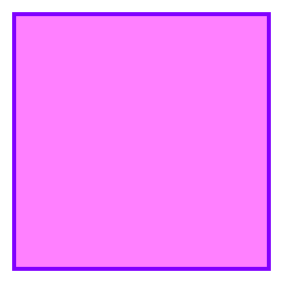

In [10]:
d = document(100, 100, 'mm')
page = d.addpage()
page.place(rect)
show(page)

Nice! You'll notice that flat's coordinate system is set up such that the *upper left-hand corner* of the page is (0, 0). The X-axis increases as you move to the right of the page, while the Y-axes increases as you move *downwards*. (This is the opposite of how it works in a regular Cartesian coordinate system, but it's very common in computer graphics for some reason.)

Because it's so common to set the fill, stroke and stroke width at once, flat supports a "chained" syntax so that you can set them all one one line. It looks like this:

In [11]:
figure = shape().fill(rgba(255, 128, 255, 255)).stroke(rgba(128, 0, 255, 255)).width(4)

With all of this in mind, I put in the cell below all of the code necessary to draw the rectangle, from the creation of the document to displaying the page. Most of the rest of the examples in this tutorial will look like this, with all of the code to display a particular shape in the same cell.

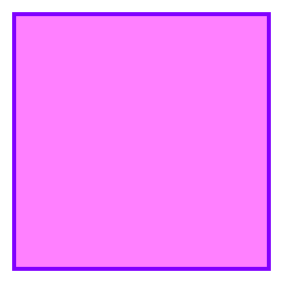

In [12]:
d = document(100, 100, 'mm')
page = d.addpage()
figure = shape().fill(rgba(255, 128, 255, 255)).stroke(rgba(128, 0, 255, 255)).width(4)
rect = figure.rectangle(5, 5, 90, 90)
page.place(rect)
show(page)

To add another shape to the drawing, add a second call to a `shape` method. Another easy one to try out is `.circle()`, which draws a circle of a particular radius centered on the given (x, y) coordinate. Note that you have to call `page.place()` with all of the components of the shape you want to appear on in the drawing.

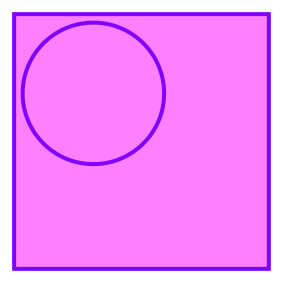

In [13]:
d = document(100, 100, 'mm')
page = d.addpage()
figure = shape().fill(rgba(255, 128, 255, 255)).stroke(rgba(128, 0, 255, 255)).width(4)
rect = figure.rectangle(5, 5, 90, 90)
circ = figure.circle(33, 33, 25)
page.place(rect)
page.place(circ)
show(page)

If you want the circle to be a different color (or have a different stroke color or stroke width) from the rectangle, you need to create a second `shape` object:

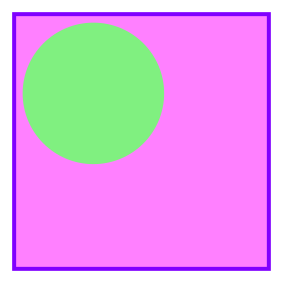

In [14]:
d = document(100, 100, 'mm')
page = d.addpage()
# shape for rectangle
figure = shape().fill(rgba(255, 128, 255, 255)).stroke(rgba(128, 0, 255, 255)).width(4)
# shape for circle
green_figure = shape().fill(rgba(128, 240, 128, 255)).nostroke()
# add rectangle to figure
rect = figure.rectangle(5, 5, 90, 90)
# add circle to green figure
circ = green_figure.circle(33, 33, 25)
# place them both
page.place(rect)
page.place(circ)
show(page)

Note that `.nostroke()` causes the shape to not have a stroke at all. Similarly, `.nofill()` will make the shape have no fill color.

> Exercise ideas: Modify the cell above to change the coordinates and colors of the rectangle and circle. Add a new element to the drawing using a new shape that we haven't discussed yet (say, `ellipse` or `line`) using a stroke and fill different from the other shapes.

## Randomness with numpy

For the purposes of this tutorial, let's think about asemic writing as a kind of random process. Our method of generating asemic writing with a computer will be to simulate the random movement of a hand holding a pen. The movement of the pen is constrained in certain ways—i.e., at any point in the process, some pen movements are more likely to happen than other pen movements. To model this process, we need a way to generate random numbers.

Fortunately, the Numpy library has a wide variety of random number generators with different useful properties. Let's talk about a few of them.

### Uniform distribution

The `uniform()` function returns a number between 0 and 1, drawn from a "uniform distribution." The word "uniform" here means that every value in the domain has *the same chance of being generated*—no number or range of numbers is more likely than any other. Run the cell below multiple times to see what happens.

In [15]:
uniform()

0.22693139830025544

Using a `for` loop, you can generate a series of numbers to see what the distribution looks like. (You can change the number `8` to something larger to generate more numbers and better understand the distribution.)

In [16]:
for i in range(8):
    print(uniform())

0.8367071257668992
0.18522579967386665
0.2887934964619685
0.36131456478081425
0.0996030875505286
0.3687988095586049
0.0823542717903829
0.7413168140682127


If you give two parameters to `uniform()`, the function will evaluate to a number chosen from that range (with the first parameter being the low end of the range, and the second parameter being the high end.)

In [17]:
for i in range(8):
    print(uniform(-5, 5))

-2.9701890357584726
-4.949001112951357
2.199951519928237
-2.087938700916545
-3.77212721764955
3.0449828106646617
-2.9255866457293758
1.0890049040835699


If you need an integer instead of a floating-point number (i.e., a number with a decimal point), you can wrap the call to `uniform()` in a call to `int()`. The cell below simulates rolling a [twenty-sided die](https://en.wikipedia.org/wiki/Dice#Standard_variations):

In [18]:
for i in range(8):
    print(int(uniform(20)+1))

18
19
15
18
18
13
13
2


> Exercise: Why do we need to add one to the result of the `uniform()` function in the example above?

### Normal distribution

A random number generator with a normal distribution (also called the Gaussian distribution or the "bell curve") produces values mostly clustered around a particular number. When generating a random number with a normal distribution, you specify the "center" of the distribution (i.e., the number that the values will cluster around) and the value for the standard deviation of the distribution, which controls the "spread" of numbers returned, above and below the center. (~70% of numbers will be within this range; ~95% will be within double the range.) Generate a random number with a normal distribution using the `normal()` function:

In [19]:
normal(0, 2)

-1.2266128526773334

The first parameter is the center, and the second is the standard deviation. (These are often called *mu* and *sigma*, respectively.) Run it a number of times and you should see that the numbers generated mostly cluster around the center:

In [20]:
for i in range(8):
    print(normal(0, 2))

-1.0117745305084995
-0.3873021725822677
-0.5595881961295469
-0.5975917174575341
-0.5592138910339963
1.883355258365555
-1.9847167793518048
-0.8514371624026741


Normal distributions are very useful in computer-generated art because they allow us to introduce and control variation, keeping values mostly in the same range.

### Truncated normal distribution

You may have noticed that sometimes the random number generator for the normal distribution produces values well outside the standard deviation. That's not a bug—it's just how normal distributions work. (In any data set, there are sometimes extreme outliers.)

Nevertheless, in computer-generated art there's often a need to generate random numbers from a normal distribution that are *constrainted* to a particular range. (For example, you might want to generate a random color with a normal distribution, but never want your color values to fall outside of the range 0–255.) For this, you can use a *truncated normal distribution*. The following cell defines a function `t_normal()` to produce such values.

In [21]:
from scipy.stats import truncnorm
def t_normal(a, b, mu, sigma):
    tn = truncnorm((a-mu)/sigma, (b-mu)/sigma, loc=mu, scale=sigma)
    return tn.rvs(1)[0]

The first parameter is the low end of the range, the second parameter is the high end, the third parameter is the center and the fourth parameter is the standard deviation.

In [22]:
t_normal(0, 255, 10, 10)

17.38589363840554

### Choosing from a list with probabilities

The `choice()` function implements a kind of *weighted* random choice, where you can set the weights randomly. The code in the cell below picks one of `50`, `100` or `150` (the values between the first set of brackets). It will pick these with 15% probability, 80% probability, and 5% probability respectively (as specified by the values between the second set of brackets).

In [23]:
choice([50, 100, 150], p=[0.15, 0.8, 0.05])

100

Calling this function multiple times should result in the specified distribution:

In [24]:
for i in range(8):
    print(choice([50, 100, 150], p=[0.15, 0.8, 0.05]))

100
50
100
100
100
100
100
150


Without the `p` parameter, the `choice()` function defaults to a uniform distribution (i.e., no result is more likely than any other):

In [25]:
for i in range(8):
    print(choice([50, 100, 150]))

50
100
100
100
100
150
50
100


The `sample()` function (from Python's standard `random` module) takes a list of values and returns the specified number of values, randomly selected (using a uniform distribution) from the list.

In [26]:
from random import sample

In [27]:
sample([5, 10, 15, 20], 2)

[10, 15]

## Visualizing distributions with flat

The code in the cell below places circles on a page with the (x, y) coordinates of their centers determined by different random distributions. The small red circles are uniformly distributed; the medium-sized green circles are normally distributed and the large blue circles are in a truncated normal distribution (centered on the center of the page, with the same spread.)

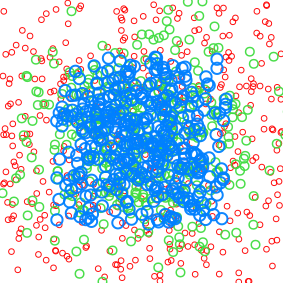

In [31]:
d = document(100, 100, 'mm')
page = d.addpage()
uniform_fig = shape().nostroke().stroke(rgba(255, 0, 0, 240)).width(1).nofill()
normal_fig = shape().nostroke().stroke(rgba(64, 220, 64, 240)).width(1.5).nofill()
t_normal_fig = shape().nostroke().stroke(rgba(0, 128, 255, 240)).width(2).nofill()
mu = 50 # center of normal distributions
sigma = 20 # standard deviation of normal distributions
sample_n = 400 # number of "samples" (i.e. circles to draw for each distribution)
for i in range(sample_n):
    c = uniform_fig.circle(uniform(100), uniform(100), 1)
    page.place(c)
for i in range(sample_n):
    c = normal_fig.circle(normal(mu, sigma), normal(mu, sigma), 1.5)
    page.place(c)
for i in range(sample_n):
    c = t_normal_fig.circle(t_normal(20, 80, mu, sigma), t_normal(20, 80, mu, sigma), 2)
    page.place(c)
show(page)

> Exercise: Copy the visualization above, but rewrite it to visualize three normal distributions with different standard deviations.

## Random compositions

The following code uses random numbers to set the stroke color, fill color, and position of a rectangle on the page. (Run it multiple times to see the results.)

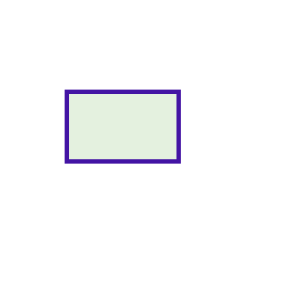

In [32]:
d = document(100, 100, 'mm')
page = d.addpage()
stroke_c = rgba(int(t_normal(0, 100, 50, 25)),
                int(t_normal(0, 100, 50, 25)),
                int(uniform(255)),
                255)
fill_c = rgba(int(uniform(255)),
              int(uniform(255)),
              int(uniform(255)),
              choice([40, 255], p=[0.9, 0.1]))
figure = shape().stroke(stroke_c).fill(fill_c).width(uniform(5))
rect = figure.rectangle(
    normal(25, 10), normal(25, 10),
    normal(50, 10), normal(20, 10))
page.place(rect)
show(page)

Play around with the parameters a bit until you understand how it works. Anywhere you see a call to `uniform()`, `normal()`, `t_normal()` or `choice()`, you can replace it with a call to another one of those same functions. (Note that colors values *always* have to be integers and always need to be between 0–255.)

The cell below uses a `for` loop to draw multiple rectangles:

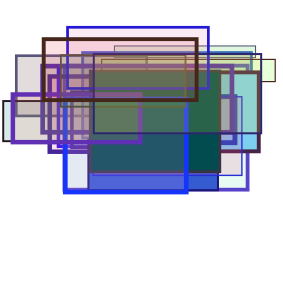

In [33]:
d = document(100, 100, 'mm')
page = d.addpage()
for i in range(int(uniform(8, 24))):
    stroke_c = rgba(int(t_normal(0, 100, 50, 25)),
                    int(t_normal(0, 100, 50, 25)),
                    int(uniform(255)),
                    255)
    fill_c = rgba(int(uniform(255)),
                  int(uniform(255)),
                  int(uniform(255)),
                  choice([40, 255], p=[0.9, 0.1]))
    figure = shape().stroke(stroke_c).fill(fill_c).width(uniform(5))
    rect = figure.rectangle(normal(25, 10), normal(25, 10),
                            normal(50, 10), normal(20, 10))
    page.place(rect)
show(page)

Here's another example that uses circles instead of rectangles:

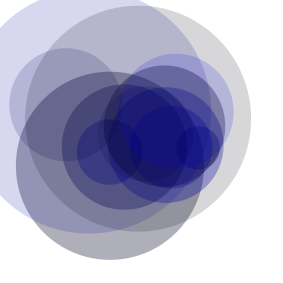

In [34]:
d = document(100, 100, 'mm')
page = d.addpage()
for i in range(12):
    fill_c = rgba(0, 0, int(uniform(255)), choice([40, 80], p=[0.5, 0.5]))
    figure = shape().nostroke().fill(fill_c).width(np.random.uniform(5))
    rect = figure.circle(normal(50, 10), normal(50, 10), t_normal(0, 100, 25, 15))
    page.place(rect)
show(page)

> Exercise: Write code to generate random compositions by copying one of the cells above and modifying the parameters. Also try adding in new shapes or combining different kinds of shapes.

> Exercise: Can you figure out how to make the "page" bigger? How do you need to adjust the parameters in the random number-generating functions to compensate?

## Saving to disk

If you make something with Flat that you really like, you can save it to disk for later use. You can do this in a number of ways, outputting to a number of formats. The `page` object's `.svg()` function returns a string of SVG:

In [35]:
page.svg()

b'<?xml version="1.0" encoding="UTF-8"?>\n<!-- Flat -->\n<svg version="1.1" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" width="283.4646pt" height="283.4646pt" viewBox="0 0 283.4646 283.4646">\n<title>Untitled</title>\n<circle cx="110.1254" cy="166.0644" r="94.2269" fill="rgba(0,0,34,0.3137)" />\n<circle cx="198.4966" cy="148.0732" r="21.7348" fill="rgba(0,0,101,0.3137)" />\n<circle cx="89.1989" cy="111.6928" r="122.3014" fill="rgba(0,0,161,0.1569)" />\n<circle cx="109.6399" cy="152.3666" r="32.7109" fill="rgba(0,0,183,0.3137)" />\n<circle cx="166.0088" cy="145.3176" r="57.9697" fill="rgba(0,0,185,0.3137)" />\n<circle cx="164.8021" cy="126.3741" r="60.7735" fill="rgba(0,0,30,0.3137)" />\n<circle cx="171.5311" cy="147.3752" r="41.3466" fill="rgba(0,0,170,0.3137)" />\n<circle cx="65.9702" cy="104.9175" r="56.6292" fill="rgba(0,0,95,0.1569)" />\n<circle cx="145.7306" cy="134.1763" r="47.7272" fill="rgba(0,0,64,0.1569)" />\n<circle cx="138.3606" cy="118.867

Which you can then write to disk using the following code:

In [42]:
with open("test.svg", "wb") as fh:
    fh.write(page.svg())

You can open this SVG file with most vector editors (Inkscape, Illustrator, etc.), though note that if you use `rgba` colors, the file might not work in some editors.

You can also save as an image using the `page` object's `.image()` method. For example, to save as a PNG:

In [49]:
with open("test.png", "wb") as fh:
    fh.write(page.image(ppi=72, kind="rgba").png())

Adjust the DPI with the `ppi` parameter. Note that Flat's PNG rasterizer is very slow, so preview at lower DPI before waiting for a higher-resolution render.

## Polylines

Okay, so, random numbers are good! But how does this help us model pen strokes? Good question. We're getting there! The next step in our asemic journey is to create a *series of lines* linking a given list of points (specified as (x, y) coordinates). The name for this shape—a series of connected lines—is a *polyline*.

The first step in making a polyline is to generate some points. The following cell creates a Python list with randomly-generated points:

In [51]:
pts = []
for i in range(10):
    pts.append([uniform(100), uniform(100)])

Here's what the points look like. This is a data structure called a *list of lists* (i.e., a list that has other lists as its elements), which for various reasons is a convenient way to store polylines and polygons.

In [52]:
pts

[[60.36032459908069, 65.3547158977641],
 [62.280674203797, 56.94104586013925],
 [83.91142491866088, 26.302416224592136],
 [4.390702053990822, 80.75201414951343],
 [93.01380401589927, 96.38233118569023],
 [82.47451022960348, 93.1129012325444],
 [75.35808534409213, 12.869157039321635],
 [18.112911517764715, 43.14229924748643],
 [19.140594247817674, 11.413486577310124],
 [28.01777525187366, 64.2754919556746]]

And here's some code to draw the points on a page, using a circle to mark each point.

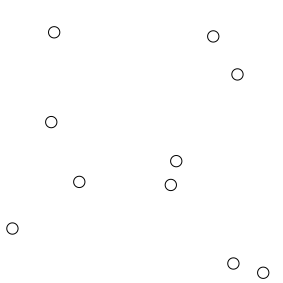

In [53]:
d = document(100, 100, 'mm')
page = d.addpage()
figure = shape().stroke(rgba(0, 0, 0, 255)).width(1)
for item in pts: # loop through the pts list, assigning each point to variable item
    c = figure.circle(item[0], item[1], 2)
    page.place(c)
show(page)

The flat library has a built-in shape type, `.polyline()`, which draws lines connecting points. But the function wants the points as a list of points with the `x` and `y` coordinates directly following one another:

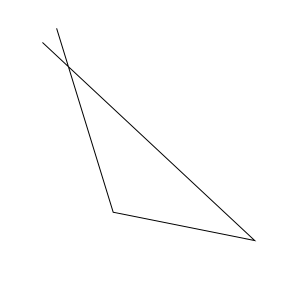

In [54]:
d = document(100, 100, 'mm')
page = d.addpage()
figure = shape().stroke(rgba(0, 0, 0, 255)).width(1)
lines = figure.polyline([20, 10, 40, 75, 90, 85, 15, 15])
page.place(lines)
show(page)

To get around this requirement of the library, the function below takes a list of lists and flattens it into a list (with the `x` and `y` components of the coordinates appropriately interleaved).

In [55]:
def flatten(t):
    from itertools import chain
    return list(chain(*t))

The code in the cell below draws a polyline from our randomly-generated points and draws circles where each point lies:

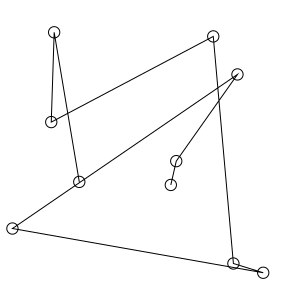

In [56]:
d = document(100, 100, 'mm')
page = d.addpage()
figure = shape().stroke(rgba(0, 0, 0, 255)).width(1)
lines = figure.polyline(flatten(pts))
page.place(lines)
for item in pts:
    c = figure.circle(item[0], item[1], 2)
    page.place(c)
show(page)

Combining all of this in the same cell, and getting rid of the circles on the points, gives us some code that generates designs that *almost* look like alien glyphs:

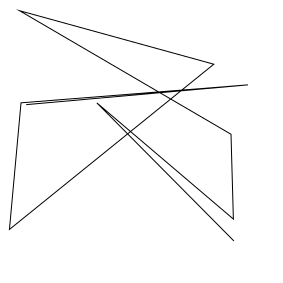

In [57]:
pts = []
for i in range(10):
    pts.append([uniform(100), uniform(100)])

d = document(100, 100, 'mm')
page = d.addpage()
figure = shape().stroke(rgba(0, 0, 0, 255)).width(1)
lines = figure.polyline(flatten(pts))
page.place(lines)
show(page)

## Polylines on a grid

Let's pursue this aesthetic a little bit further. Introducing further constraints to the randomness will result in designs that give the impression of conforming to an underlying system (and, let's hypothesize, thereby give an impression of being more like "writing"). The code below also uses random polylines, but constrains the polylines to begin and end on certain points in the grid.

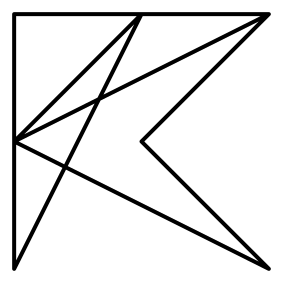

In [82]:
d = document(100, 100, 'mm')
page = d.addpage()
figure = shape().stroke(rgba(0, 0, 0, 255)).width(4).join('round')
pts = []
for i in range(12):
    x = 5 + choice([0, 0.5, 1]) * 90
    y = 5 + choice([0, 0.5, 1]) * 90
    pts.append([x, y])
lines = figure.polyline(flatten(pts))
page.place(lines)
show(page)

The key bit of code here is:

In [59]:
5 + choice([0, 0.5, 1]) * 90

5.0

... which is a Python expression that returns one of `0`, `0.5`, and `1` (at random), multiplies the result by 90 and adds five. Using this expression for both the `x` and `y` coordinate of each point on the polyline leads to a result wherein each polyline randomly connects one of nine points on a grid.

The cell below defines a function, `make_char()`, that generates a series of points using a more general version of this expression, allowing you to specify an x-offset and y-offset (to set the upper left-hand corner of the grid) and a size (the multiplier). It adds four to twelve segments to the polyline (randomly determined).

In [60]:
def make_char(xoffset, yoffset, size):
    pts = []
    for i in range(int(t_normal(4, 12, 8, 2))):
        x = xoffset + (choice([0, 0.5, 1]) * size)
        y = yoffset + (choice([0, 0.5, 1]) * size)
        pts.append([x, y])
    return pts

The results of the `make_char()` function:

In [61]:
make_char(0, 0, 10)

[[5.0, 0.0],
 [5.0, 10.0],
 [5.0, 0.0],
 [10.0, 5.0],
 [5.0, 0.0],
 [10.0, 5.0],
 [5.0, 5.0],
 [10.0, 10.0],
 [0.0, 5.0],
 [10.0, 10.0]]

The following cell draws these "characters" on a grid, so we can see many variations at once:

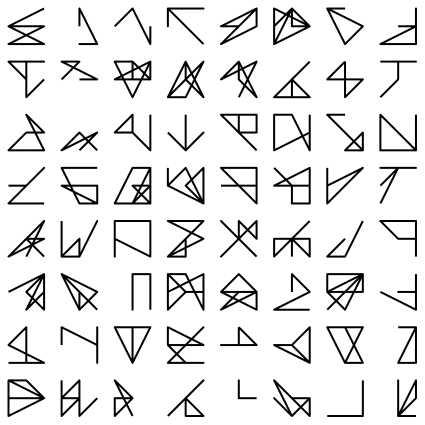

In [62]:
size = 150 # change the size of the page
d = document(size, size, 'mm')
page = d.addpage()
figure = shape().stroke(rgba(0, 0, 0, 255)).width(2).join('round')
grid_n = 8 # change the number of elements in the grid on one side
grid_size = size / grid_n
for i in range(grid_n):
    for j in range(grid_n):
        pts = make_char(3 + i * grid_size, 3 + j * grid_size, grid_size * 0.67)
        lines = figure.polyline(flatten(pts))
        page.place(lines)
show(page)

Now we're getting somewhere. When your sci-fi author friend texts you and says "Hey, I need something that looks like a writing system for space aliens for the cover of my next book," you've got something all ready to go.

> Exercise: Can you make these polylines fall on a 4x4 grid instead of a 3x3 grid? Or a 5x5 grid?

> Exercise: Add some randomness to each point's placement, so not all points fall directly on the grid.

> Exercise: Change the aspect ratio of the "characters"—make them wider than they are tall, or taller than they are wide.

## Interpolating curves

Due to certain properties of human physiology, handwriting hardly ever consists of exactly straight lines. To simulate the curved lines of conventional handwriting, we need to find a way to change our polylines into *curves*. One way of doing this is a [Catmull-Rom spline](https://en.wikipedia.org/wiki/Centripetal_Catmull%E2%80%93Rom_spline), which produces a sequence of [Bézier curves](https://pomax.github.io/bezierinfo/) that pass through a given set of points. My Bezmerizing library has a function `smooth_point_path()` that uses Catmull-Rom to produce a path (i.e., a sequence of drawing instructions) that can draw such a curve given a set of points.

The following cell generates some points with a normal distribution:

In [63]:
pts = []
for i in range(10):
    pts.append([normal(50, 25), normal(50, 25)])

And then this cell calls `smooth_point_path()` on the points, returning a list of curves:

In [64]:
curve_path = smooth_point_path(pts)

For our purpose, the exact nature of Bézier curves and the flat library's path commands are not consequential. Suffice it to say that you can pass the result of `smooth_point_path()` to the `.path()` method of a flat `shape` object. The cell below draws both the points and the curve passing through those points:

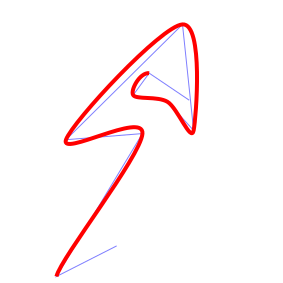

In [65]:
d = document(100, 100, 'mm')
page = d.addpage()
line_figure = shape().stroke(rgba(0, 0, 255, 128)).width(1)
curve_figure = shape().stroke(rgba(255, 0, 0, 255)).width(4)
lines = line_figure.polyline(flatten(pts))
curve = curve_figure.path(curve_path)
page.place(lines)
page.place(curve)
show(page)

You can give any list of points to `smooth_point_path()`. The following example copies the grid of alien letterforms above, but uses `smooth_point_path()` to convert the points to curves before drawing. The results are much more "organic":

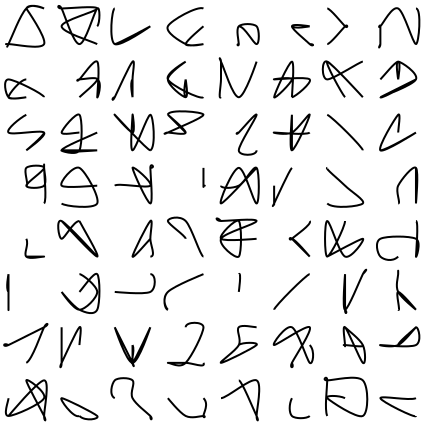

In [66]:
size = 150
d = document(size, size, 'mm')
page = d.addpage()
figure = shape().stroke(rgba(0, 0, 0, 255)).width(2).join('round')
grid_n = 8
grid_size = size / grid_n
for i in range(grid_n):
    for j in range(grid_n):
        pts = make_char(3 + i * grid_size, 3 + j * grid_size, grid_size * 0.67)
        instrs = smooth_point_path(pts)
        curve = figure.path(instrs)
        page.place(curve)
show(page)

## Scribbling in a line

Writing in certain alphabets proceeds in a linear direction across the page with connected letters; English cursive does this in particular. To simulate this, I wrote a function that generates a polyline with random points evenly spaced along a line horizontally, with the y-coordinate of each point set according to a random number selected from a normal distribution centered on zero.

In [67]:
def make_scribble(xoffset, yoffset, width, height, steps, stddev=0):
    pts = []
    for i in range(steps):
        x = xoffset + ((width / steps) * i) + normal(0, stddev)
        y = yoffset + normal(0, height)
        pts.append([x, y])
    return pts

Here's what it looks like. (The green line is the original polyline; the black line is the smoothed curve.)

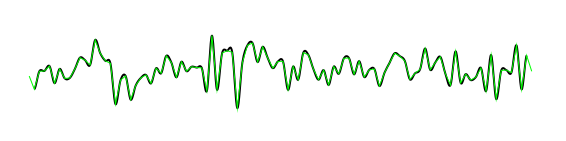

In [68]:
size = 200
d = document(200, 50, 'mm')
page = d.addpage()
line_figure = shape().stroke(rgba(0, 255, 0, 255)).width(1)
curve_figure = shape().stroke(rgba(0, 0, 0, 255)).width(2)
pts = make_scribble(xoffset=10,
                    yoffset=25,
                    width=180,
                    height=5,
                    steps=100,
                    stddev=0)
lines = line_figure.polyline(flatten(pts))
curve = curve_figure.path(smooth_point_path(pts))
page.place(curve) # comment to hide curves
page.place(lines) # comment to hide non-smooth lines
show(page)

The function also has a `stddev` parameter that allows you to adjust the standard deviation of a normally-distributed random number that adjusts the spacing of each point along the x-axis. This allows for the possibility of letters looping back on themselves:

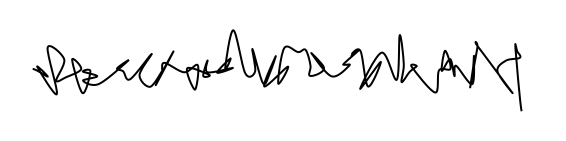

In [69]:
size = 200
d = document(200, 50, 'mm')
page = d.addpage()
line_figure = shape().stroke(rgba(0, 255, 0, 255)).width(1)
pts = make_scribble(xoffset=10,
                    yoffset=25,
                    width=180,
                    height=5,
                    steps=100,
                    stddev=3)
curve = curve_figure.path(smooth_point_path(pts))
page.place(curve)
show(page)

The following example displays multiple "lines" of these scribbles, moving down the page, using a `for` loop:

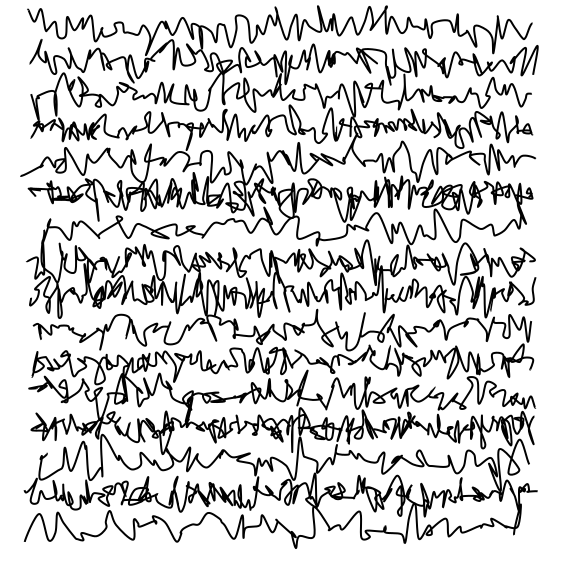

In [70]:
size = 200
d = document(size, size, 'mm')
page = d.addpage()
line_figure = shape().stroke(rgba(0, 255, 0, 255)).width(1)
curve_figure = shape().stroke(rgba(0, 0, 0, 255)).width(2)
row_n = 16
for i in range(row_n):
    pts = make_scribble(xoffset=10,
                        yoffset=10+(i*(size/(row_n+1))), # row_n + 1 to leave some space at the bottom
                        width=size-20,
                        height=(size/row_n)*0.25,
                        steps=int(uniform(25, 250)),
                        stddev=uniform(2))
    lines = line_figure.polyline(flatten(pts))
    curve = curve_figure.path(smooth_point_path(pts))
    page.place(curve)
    #page.place(lines) # uncomment to see original lines
show(page)

> Exercise: Use the `i` parameter of the loop to control some other aspect of the line generation. (For example, make it so the number of steps increases as the scribbles move down the page.)

> Exercise: Introduce randomly-placed crosses (like the cross in `t`) and dots (as in `i`).

## Weighted strokes

The strokes produced by the flat library have a uniform width and texture, which makes the resulting artifacts resemble drawings made with a very precise pen. The problem of how to simulate how different writing implements make marks on a page ("brushes" in a tool like PhotoShop) is an open area of research in computer graphics research. ([A recent review](https://onlinelibrary.wiley.com/doi/full/10.1002/cav.1435).)

The Bezmerizing library implements a simple technique for simulating an ink brush or other kinds of pens, which works by drawing a polygon along the tangents of the curves composing the stroke. The function to generate the polygon is `fancy_curve()`:

In [71]:
from bezmerizing import fancy_curve

As an example, let's define a set of points:

In [72]:
pts = [[10, 10], [15, 15], [15, 85], [50, 50], [85, 85], [85, 15], [90, 10]]

... and then create the polygon around the curve with `fancy_curve`. The `samples_per` parameter controls the resolution of the polygon (lower values are faster to calculate but chunkier) and the `thicknesses` parameter controls the thickness of the polygon along the path.

In [73]:
curve_poly = fancy_curve(pts, samples_per=24, thicknesses=[0, 2, 10, 2, 8, 2])

Here's an example that draws the Catmull-Rom curve on top of the polygon, just to show you how it works:

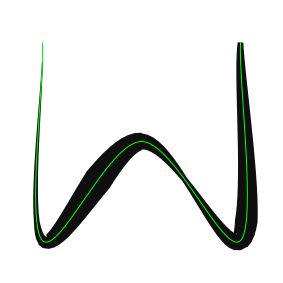

In [74]:
d = document(100, 100, 'mm')
page = d.addpage()
curve_figure = shape().nostroke().fill(rgba(0, 0, 0, 240))
smooth_figure = shape().stroke(rgba(0, 255, 0, 255))
smooth_path = smooth_point_path(pts)
poly = curve_figure.polygon(flatten(curve_poly))
path = smooth_figure.path(smooth_path)
page.place(poly)
page.place(path)
show(page)

Here's the "alien characters" example above, except using `fancy_curve()` to generate polygons for each stroke. (Try playing around with the `thickness` parameter.)

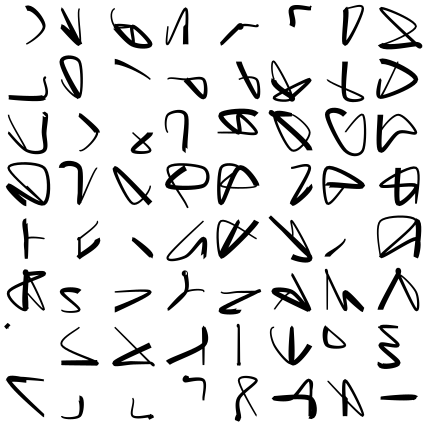

In [78]:
size = 150
d = document(size, size, 'mm')
page = d.addpage()
figure = shape().nostroke().fill(rgba(0, 0, 0, 255))
grid_n = 8
grid_size = size / grid_n
for i in range(grid_n):
    for j in range(grid_n):
        pts = make_char(3 + i * grid_size, 3 + j * grid_size, grid_size * 0.67)
        poly_pts = fancy_curve(pts, samples_per=12, thicknesses=[2, 1, 0.5])
        poly = figure.polygon(flatten(poly_pts))
        page.place(poly)
show(page)